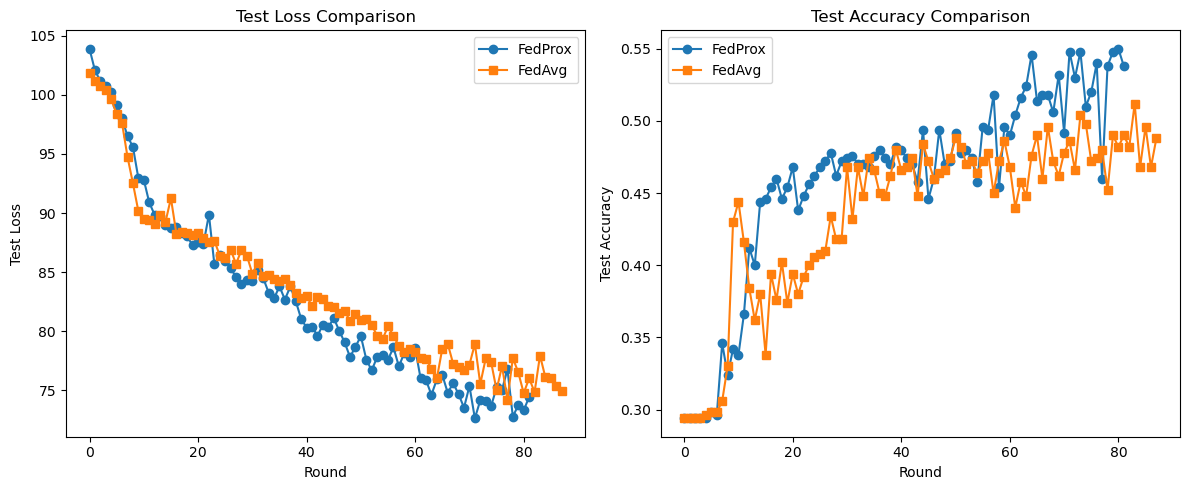

In [2]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    results = record.get('Results_weighted_avg', {})
                    if 'test_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

# 加载 FedProx 和 FedAvg 的日志数据
fedprox_log = 'fedprox_rnn_on_ut_har_lr0.0005_lstep5/eval_results.log'
fedavg_log   = 'FedAvg_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250406170537/eval_results.log'

rounds_prox, losses_prox, accs_prox = load_data(fedprox_log)
rounds_avg,  losses_avg,  accs_avg  = load_data(fedavg_log)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比
axs[0].plot(rounds_prox, losses_prox, marker='o', label='FedProx')
axs[0].plot(rounds_avg, losses_avg, marker='s', label='FedAvg')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比
axs[1].plot(rounds_prox, accs_prox, marker='o', label='FedProx')
axs[1].plot(rounds_avg, accs_avg, marker='s', label='FedAvg')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()


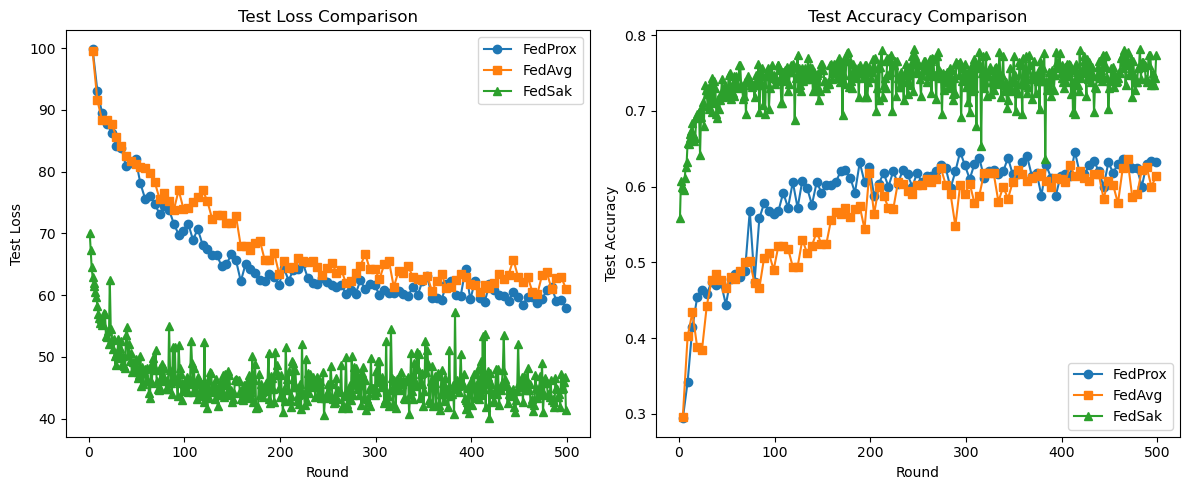

In [200]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    results = record.get('Results_weighted_avg', {})
                    if 'test_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

# 加载 FedProx, FedAvg 和 FesSak 的日志数据
fedprox_log = 'fedprox_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250512022309/eval_results.log'
fedavg_log = 'FedAvg_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250512022240/eval_results.log'
fedsak_log = 'fedsak_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250512174446/eval_results.log'

rounds_prox, losses_prox, accs_prox = load_data(fedprox_log)
rounds_avg,  losses_avg,  accs_avg  = load_data(fedavg_log)
rounds_sak,  losses_sak,  accs_sak  = load_data(fedsak_log)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比
axs[0].plot(rounds_prox, losses_prox, marker='o', label='FedProx')
axs[0].plot(rounds_avg, losses_avg, marker='s', label='FedAvg')
axs[0].plot(rounds_sak, losses_sak, marker='^', label='FedSak')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比
axs[1].plot(rounds_prox, accs_prox, marker='o', label='FedProx')
axs[1].plot(rounds_avg, accs_avg, marker='s', label='FedAvg')
axs[1].plot(rounds_sak, accs_sak, marker='^', label='FedSak')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()

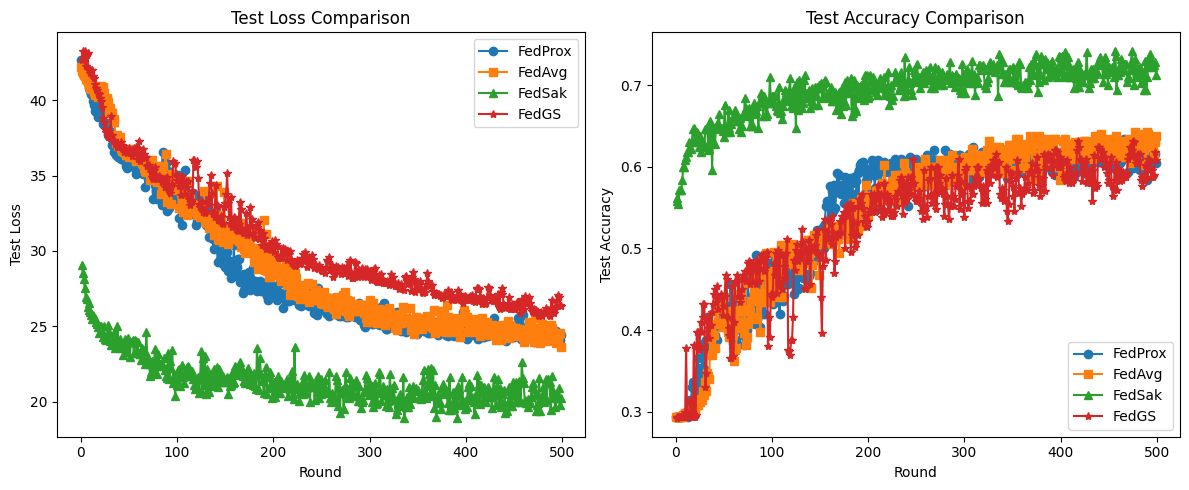

In [1]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    results = record.get('Results_weighted_avg', {})
                    if 'test_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

# 加载 FedProx, FedAvg 和 FesSak 的日志数据
fedprox_log = 'fedprox_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616150053/eval_results.log'
fedavg_log = 'FedAvg_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616150148/eval_results.log'
fedsak_log = 'fedsak_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616150218/eval_results.log'
fedgs_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616152819/eval_results.log'

rounds_prox, losses_prox, accs_prox = load_data(fedprox_log)
rounds_avg,  losses_avg,  accs_avg  = load_data(fedavg_log)
rounds_sak,  losses_sak,  accs_sak  = load_data(fedsak_log)
rounds_gs,   losses_gs,   accs_gs   = load_data(fedgs_log)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比
axs[0].plot(rounds_prox, losses_prox, marker='o', label='FedProx')
axs[0].plot(rounds_avg, losses_avg, marker='s', label='FedAvg')
axs[0].plot(rounds_sak, losses_sak, marker='^', label='FedSak')
axs[0].plot(rounds_gs, losses_gs, marker='*', label='FedGS')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比
axs[1].plot(rounds_prox, accs_prox, marker='o', label='FedProx')
axs[1].plot(rounds_avg, accs_avg, marker='s', label='FedAvg')
axs[1].plot(rounds_sak, accs_sak, marker='^', label='FedSak')
axs[1].plot(rounds_gs, accs_gs, marker='*', label='FedGS')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()

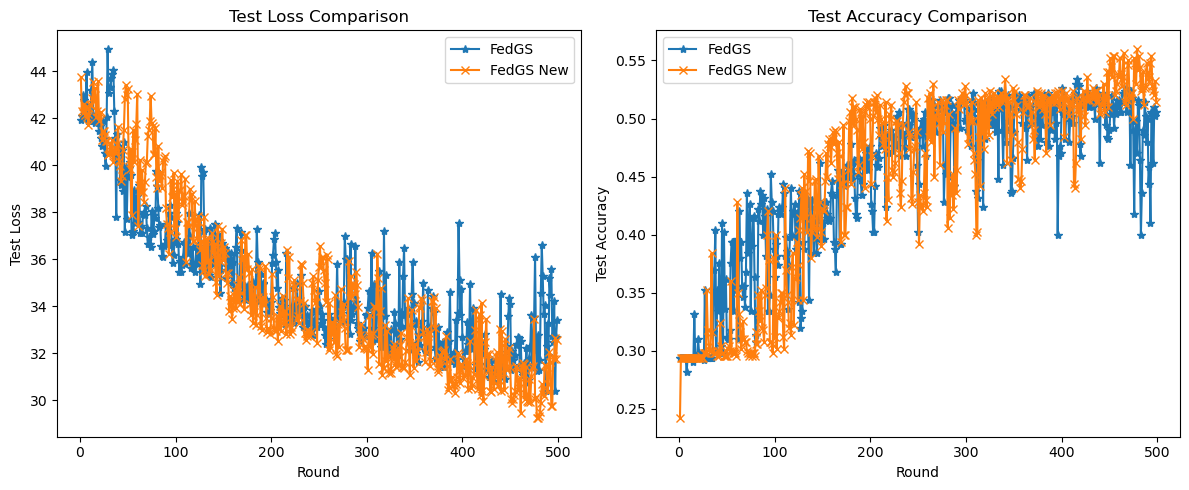

In [170]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    results = record.get('Results_weighted_avg', {})
                    if 'test_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

# 加载 FedProx, FedAvg 和 FesSak 的日志数据
# fedprox_log = 'fedprox_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616150053/eval_results.log'
# fedavg_log = 'FedAvg_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616150148/eval_results.log'
# fedsak_log = 'fedsak_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616150218/eval_results.log'
fedgs_log =   'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250611173649/eval_results.log'
fedgs_new_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616000038/eval_results.log'
# rounds_prox, losses_prox, accs_prox = load_data(fedprox_log)
# rounds_avg,  losses_avg,  accs_avg  = load_data(fedavg_log)
# rounds_sak,  losses_sak,  accs_sak  = load_data(fedsak_log)
rounds_gs,   losses_gs,   accs_gs   = load_data(fedgs_log)
rounds_gs_new, losses_gs_new, accs_gs_new = load_data(fedgs_new_log)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比
# axs[0].plot(rounds_prox, losses_prox, marker='o', label='FedProx')
# axs[0].plot(rounds_avg, losses_avg, marker='s', label='FedAvg')
# axs[0].plot(rounds_sak, losses_sak, marker='^', label='FedSak')
axs[0].plot(rounds_gs, losses_gs, marker='*', label='FedGS')
axs[0].plot(rounds_gs_new, losses_gs_new, marker='x', label='FedGS New')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比
# axs[1].plot(rounds_prox, accs_prox, marker='o', label='FedProx')
# axs[1].plot(rounds_avg, accs_avg, marker='s', label='FedAvg')
# axs[1].plot(rounds_sak, accs_sak, marker='^', label='FedSak')
axs[1].plot(rounds_gs, accs_gs, marker='*', label='FedGS')
axs[1].plot(rounds_gs_new, accs_gs_new, marker='x', label='FedGS New')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()

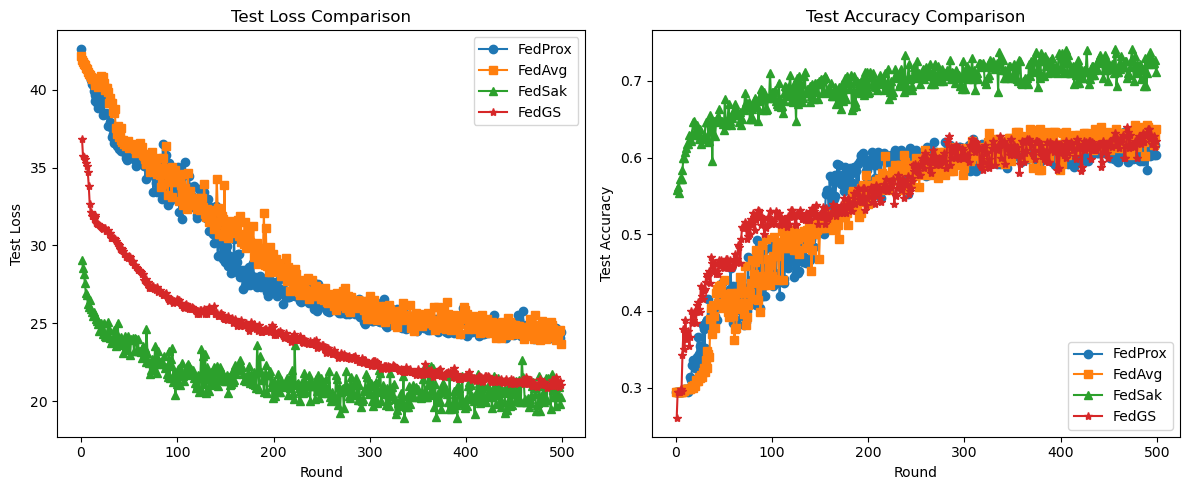

In [34]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    results = record.get('Results_weighted_avg', {})
                    if 'test_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

# 加载 FedProx, FedAvg 和 FesSak 的日志数据
fedprox_log = 'fedprox_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250630102937/eval_results.log'
fedavg_log = 'FedAvg_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250629123127/eval_results.log'
fedsak_log = 'fedsak_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250616150218/eval_results.log'
fedgs_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250629122658/eval_results.log'
# fedgs_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250629163130/eval_results.log'


rounds_prox, losses_prox, accs_prox = load_data(fedprox_log)
rounds_avg,  losses_avg,  accs_avg  = load_data(fedavg_log)
rounds_sak,  losses_sak,  accs_sak  = load_data(fedsak_log)
rounds_gs,   losses_gs,   accs_gs   = load_data(fedgs_log)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比
axs[0].plot(rounds_prox, losses_prox, marker='o', label='FedProx')
axs[0].plot(rounds_avg, losses_avg, marker='s', label='FedAvg')
axs[0].plot(rounds_sak, losses_sak, marker='^', label='FedSak')
axs[0].plot(rounds_gs, losses_gs, marker='*', label='FedGS')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比
axs[1].plot(rounds_prox, accs_prox, marker='o', label='FedProx')
axs[1].plot(rounds_avg, accs_avg, marker='s', label='FedAvg')
axs[1].plot(rounds_sak, accs_sak, marker='^', label='FedSak')
axs[1].plot(rounds_gs, accs_gs, marker='*', label='FedGS')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()

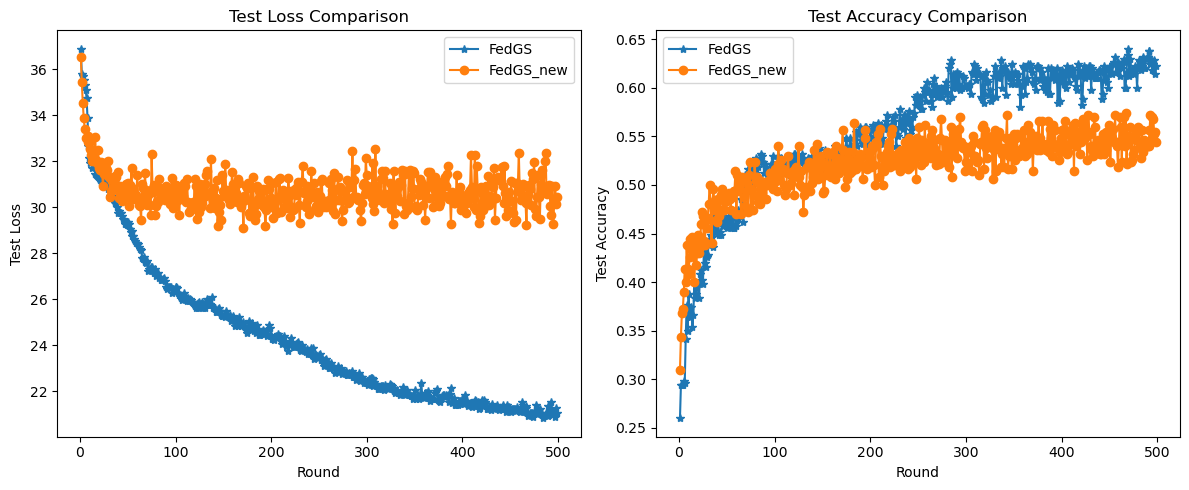

In [54]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    results = record.get('Results_weighted_avg', {})
                    if 'test_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

fedgs_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250629122658/eval_results.log'
# fedgs_new_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250629163130/eval_results.log'
fedgs_new_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250701130849/eval_results.log'


rounds_gs,   losses_gs,   accs_gs   = load_data(fedgs_log)
rounds_gs_new,   losses_gs_new,   accs_gs_new   = load_data(fedgs_new_log)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比

axs[0].plot(rounds_gs, losses_gs, marker='*', label='FedGS')
axs[0].plot(rounds_gs_new, losses_gs_new, marker='o', label='FedGS_new')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比

axs[1].plot(rounds_gs, accs_gs, marker='*', label='FedGS')
axs[1].plot(rounds_gs_new, accs_gs_new, marker='o', label='FedGS_new')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()

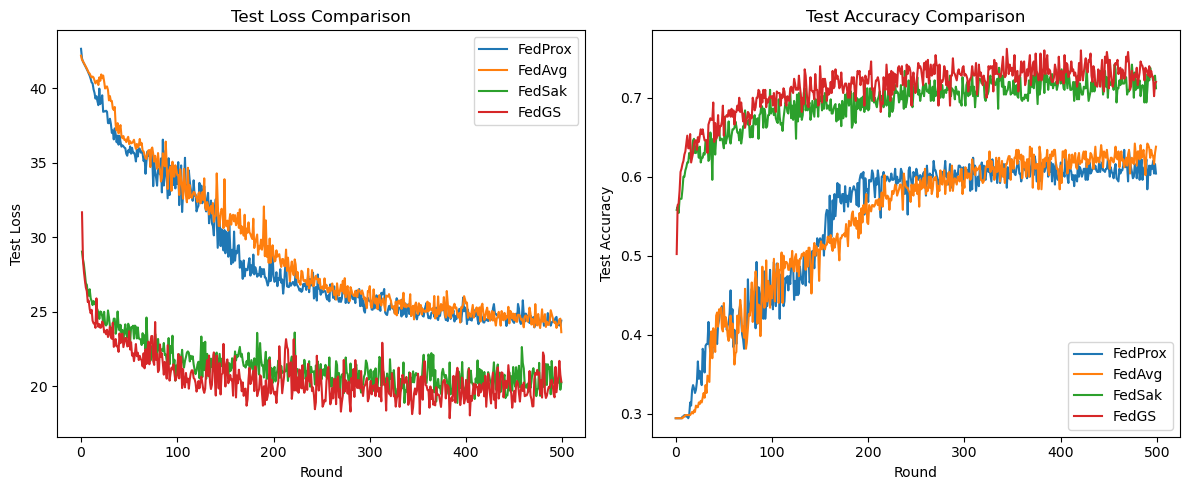

In [32]:
import ast
import matplotlib.pyplot as plt

def load_data(log_file):
    rounds = []
    test_losses = []
    test_accs = []
    with open(log_file, 'r', encoding='utf8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            try:
                record = ast.literal_eval(line)
                # 只处理 Role 为 "Server #" 且 Round 为整数的记录
                if record.get('Role') == 'Server #' and isinstance(record.get('Round'), int):
                    round_num = record['Round']
                    results = record.get('Results_weighted_avg', {})
                    if 'test_loss' in results and 'test_acc' in results:
                        rounds.append(round_num)
                        test_losses.append(results['test_loss'])
                        test_accs.append(results['test_acc'])
            except Exception as e:
                continue
    return rounds, test_losses, test_accs

# 加载 FedProx, FedAvg 和 FesSak 的日志数据
fedprox_log = 'fedprox_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250707101928/eval_results.log'
fedavg_log = 'FedAvg_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250707101859/eval_results.log'
fedsak_log = 'fedsak_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250707102023/eval_results.log'
fedgs_log = 'fedgs_rnn_on_ut_har_lr0.0005_lstep5/sub_exp_20250707102049/eval_results.log'


rounds_prox, losses_prox, accs_prox = load_data(fedprox_log)
rounds_avg,  losses_avg,  accs_avg  = load_data(fedavg_log)
rounds_sak,  losses_sak,  accs_sak  = load_data(fedsak_log)
rounds_gs,   losses_gs,   accs_gs   = load_data(fedgs_log)

# 创建一个包含1行2列的图表
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 左侧子图：Test Loss 对比
axs[0].plot(rounds_prox, losses_prox, label='FedProx')
axs[0].plot(rounds_avg, losses_avg, label='FedAvg')
axs[0].plot(rounds_sak, losses_sak, label='FedSak')
axs[0].plot(rounds_gs, losses_gs, label='FedGS')
axs[0].set_xlabel("Round")
axs[0].set_ylabel("Test Loss")
axs[0].set_title("Test Loss Comparison")
axs[0].legend()

# 右侧子图：Test Accuracy 对比
axs[1].plot(rounds_prox, accs_prox, label='FedProx')
axs[1].plot(rounds_avg, accs_avg, label='FedAvg')
axs[1].plot(rounds_sak, accs_sak, label='FedSak')
axs[1].plot(rounds_gs, accs_gs, label='FedGS')
axs[1].set_xlabel("Round")
axs[1].set_ylabel("Test Accuracy")
axs[1].set_title("Test Accuracy Comparison")
axs[1].legend()

plt.tight_layout()
plt.show()